# Download data

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv

--2020-11-13 14:03:18--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6220 (6.1K) [text/plain]
Saving to: ‘daily-total-female-births.csv.3’

daily-total-female- 100%[===================>]   6.07K  --.-KB/s    in 0.003s  

2020-11-13 14:03:18 (1.91 MB/s) - ‘daily-total-female-births.csv.3’ saved [6220/6220]



In [113]:
import pandas as pd 
from datetime import date, timedelta
import holidays
from calendar import monthrange
import plotly.express as px 
import seaborn as sns 

In [114]:
report = [f'''# Original data''']

<AxesSubplot:xlabel='Date'>

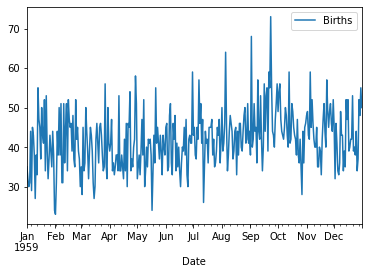

In [116]:
df = pd.read_csv('daily-total-female-births.csv')

df.Date = pd.to_datetime(df.Date)

df.set_index('Date').plot()

# Extract features

## Extract weekday

In [117]:
df['weekday'] = df.Date.dt.weekday

In [118]:
df 

,Date,Births,weekday
0,1959-01-01,35,3
1,1959-01-02,32,4
2,1959-01-03,30,5
3,1959-01-04,31,6
4,1959-01-05,44,0
...,...,...,...
360,1959-12-27,37,6
361,1959-12-28,52,0
362,1959-12-29,48,1
363,1959-12-30,55,2


## Extract holidays

In [119]:
california_holidays = holidays.UnitedStates(state='CA')

In [120]:
df.Date[0]

Timestamp('1959-01-01 00:00:00')

In [121]:
california_holidays.get(df.Date[0])

"New Year's Day"

In [122]:
california_holidays

{datetime.date(1959, 1, 1): "New Year's Day",
 datetime.date(1959, 2, 22): "Washington's Birthday",
 datetime.date(1959, 5, 30): 'Memorial Day',
 datetime.date(1959, 7, 4): 'Independence Day',
 datetime.date(1959, 7, 3): 'Independence Day (Observed)',
 datetime.date(1959, 9, 7): 'Labor Day',
 datetime.date(1959, 10, 12): 'Columbus Day',
 datetime.date(1959, 11, 11): 'Veterans Day',
 datetime.date(1959, 11, 26): 'Thanksgiving',
 datetime.date(1959, 12, 25): 'Christmas Day'}

In [123]:
'2020-1-1' in california_holidays

True

In [124]:
print(california_holidays.get('2020-12-01'))

None


In [125]:
df['holidays'] = df.Date.apply(lambda date: california_holidays.get(date))
df.holidays = df.holidays.fillna('No holiday') 

birth_df = df.groupby('holidays').median().reset_index()
birth_df

,holidays,Births,weekday
0,Christmas Day,44,4
1,Columbus Day,40,0
2,Independence Day,37,5
3,Independence Day (Observed),38,4
4,Labor Day,45,0
5,Memorial Day,40,5
6,New Year's Day,35,3
7,No holiday,42,3
8,Thanksgiving,49,3
9,Veterans Day,40,2


In [126]:
px.bar(birth_df, x='holidays', y='Births')

In [127]:
df.holidays.value_counts()

No holiday                     355
Memorial Day                     1
Christmas Day                    1
Veterans Day                     1
Thanksgiving                     1
Washington's Birthday            1
New Year's Day                   1
Labor Day                        1
Independence Day                 1
Independence Day (Observed)      1
Columbus Day                     1
Name: holidays, dtype: int64

## Month range

In [128]:
date1 = df.Date[0]

month, year = date1.month, date1.year

first_day_of_month, days_in_a_month = monthrange(year, month)

In [129]:
print('Month:', month)
print('Year:', year)
print('Weekday of first day of the month:', first_day_of_month)
print('Number of days in month:', days_in_a_month)

Month: 1
Year: 1959
Weekday of first day of the month: 3
Number of days in month: 31


In [130]:
def extract_month_range(year, month):
    '''Extract how many days in a month'''
    
    first_day_of_month, days_in_a_month = monthrange(int(year), int(month))
    return days_in_a_month

In [131]:
average_per_month = df.set_index('Date').resample('M').mean()

average_per_month['month'] = average_per_month.index.month
average_per_month['year'] = average_per_month.index.year

In [132]:
average_per_month['days_in_a_month'] = average_per_month.apply(lambda row: extract_month_range(row.year, row.month), axis=1)

In [133]:
average_per_month

,Births,weekday,month,year,days_in_a_month
Date,,,,,
1959-01-31,39.129032,3.096774,1,1959,31
1959-02-28,41.000000,3.000000,2,1959,28
1959-03-31,39.290323,2.935484,3,1959,31
1959-04-30,39.833333,2.966667,4,1959,30
1959-05-31,38.967742,3.193548,5,1959,31
1959-06-30,40.400000,2.833333,6,1959,30
1959-07-31,41.935484,3.000000,7,1959,31
1959-08-31,43.580645,3.064516,8,1959,31
1959-09-30,48.200000,2.900000,9,1959,30


In [134]:
fig = px.line(average_per_month, x='month', y='Births')
fig

In [135]:
fig = px.bar(average_per_month, x='month', y='days_in_a_month')
fig